In [25]:
import pandas as pd
# Para colocar os dados tabulares em um dataframe precisamos utilizar a biblioteca pandas
df = pd.read_csv('tic-tac-toe.csv')

In [26]:
negatives_df = df.loc[df['class'] == 'negative']
x_win_df = df.loc[df['class'] == 'positive']
x_win_df['class'] = 'X'
x_win_df

C:\Users\nicho\AppData\Local\Temp\ipykernel_20016\256588224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_win_df['class'] = 'X'


,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,class
0,x,x,x,x,o,o,x,o,o,X
1,x,x,x,x,o,o,o,x,o,X
2,x,x,x,x,o,o,o,o,x,X
3,x,x,x,x,o,o,o,b,b,X
4,x,x,x,x,o,o,b,o,b,X
...,...,...,...,...,...,...,...,...,...,...
621,b,b,b,x,x,x,o,b,o,X
622,b,b,b,x,x,x,b,o,o,X
623,b,b,b,o,o,b,x,x,x,X
624,b,b,b,o,b,o,x,x,x,X


In [27]:
def calculateWinner(board):
    winningPositions = [
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 3, 6],
        [1, 4, 7],
        [2, 5, 8],
        [0, 4, 8],
        [2, 4, 6],
    ]
    for i in range(len(winningPositions)):
        [a, b, c] = winningPositions[i]
        if board[a] == board[b] and board[a] == board[c]:
            return board[a].upper()
    return 'DRAW'

In [28]:

for index, row in negatives_df.iterrows():
    # Do some processing on the row
    winner = calculateWinner(row)
    row['class'] = winner
    # Assign the modified row back to the DataFrame
    negatives_df.loc[index] = row

new_df = pd.concat([x_win_df,negatives_df])
new_df.to_csv('tic_tac_toe_dataset2.csv', index=False)


C:\Users\nicho\AppData\Local\Temp\ipykernel_20016\3746887681.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if board[a] == board[b] and board[a] == board[c]:
C:\Users\nicho\AppData\Local\Temp\ipykernel_20016\3746887681.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return board[a].upper()
C:\Users\nicho\AppData\Local\Temp\ipykernel_20016\4242114610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negatives_df.loc[index

In [29]:
import pandas as pd
df = pd.read_csv('tic_tac_toe_dataset.csv')

In [30]:
from sklearn.model_selection import train_test_split
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

df_treino.head()

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,class
137,x,o,x,b,x,o,x,b,o,X
377,o,o,x,x,o,x,b,b,x,X
388,o,o,x,o,o,x,x,x,x,X
824,o,o,o,x,b,x,x,o,x,O
767,o,x,x,b,x,x,o,o,o,O


In [31]:
# Copiando a classificação (qm ganhou), 
# pois iremos utilizar depois para comparar os resultados do modelo e ver se ta certo
df_treino_target = df_treino['class'].copy()
df_teste_target = df_teste['class'].copy()

# Removendo a classificação (qm ganhou)
df_treino = df_treino.drop(columns=['class'])
df_teste  = df_teste.drop(columns=['class'])

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preproc_completo = ColumnTransformer([
    ('numericos',   'passthrough',    []),
    ('categoricos', OneHotEncoder(),  ['atr1','atr2','atr3','atr4','atr5','atr6','atr7','atr8','atr9']),
    ], 
    sparse_threshold=0)

# pre-processamento (apenas dos dados categóricos) do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)
Y_treino = df_treino_target.values

# pre-processamento (apenas dos dados categóricos) do conjunto de teste
X_teste = preproc_completo.transform(df_teste)
Y_teste = df_teste_target.values

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score   
from sklearn.metrics import recall_score      
from sklearn.metrics import f1_score 

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [{
  'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_leaf': [2,3,4,5,6,7,8,9]
}]

arvore = DecisionTreeClassifier()

grid_search = GridSearchCV(arvore,param_grid)
grid_search.fit(X_treino, Y_treino)

arvore = grid_search.best_estimator_

mlp_clf = MLPClassifier(hidden_layer_sizes=(30,15),max_iter=500)
knn_clf = KNeighborsClassifier(5)

print("Estimador................: Acur. - Prec. - Rec.  - F1")
print("--------------------------------------------------------")
for estimador in (mlp_clf,knn_clf,arvore):
    estimador.fit(X_treino, Y_treino)
    previsoes = estimador.predict(X_teste)
    print("%.25s: %2.3f - %2.3f - %2.3f - %2.3f" 
                                  %(estimador.__class__.__name__.ljust(25, '.'), 
                                    accuracy_score (  Y_teste, previsoes),
                                    precision_score(  Y_teste, previsoes, average='macro'),
                                    recall_score   (  Y_teste, previsoes, average='macro'),
                                    f1_score       (  Y_teste, previsoes, average='macro'),
                                   ))

Estimador................: Acur. - Prec. - Rec.  - F1
--------------------------------------------------------
MLPClassifier............: 0.980 - 0.744 - 0.730 - 0.737
KNeighborsClassifier.....: 0.888 - 0.807 - 0.710 - 0.747
DecisionTreeClassifier...: 0.907 - 0.851 - 0.782 - 0.787


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[Text(0.5605279126213593, 0.95, 'x[13] <= 0.5\ngini = 0.527\nsamples = 100.0%\nvalue = [0.017, 0.062, 0.309, 0.611]\nclass = X'),
 Text(0.3094660194174757, 0.85, 'x[1] <= 0.5\ngini = 0.429\nsamples = 63.8%\nvalue = [0.013, 0.059, 0.201, 0.726]\nclass = X'),
 Text(0.1529126213592233, 0.75, 'x[25] <= 0.5\ngini = 0.376\nsamples = 40.6%\nvalue = [0.009, 0.087, 0.13, 0.774]\nclass = X'),
 Text(0.05339805825242718, 0.65, 'x[9] <= 0.5\ngini = 0.212\nsamples = 24.3%\nvalue = [0.0, 0.121, 0.0, 0.879]\nclass = X'),
 Text(0.019417475728155338, 0.55, 'x[18] <= 0.5\ngini = 0.029\nsamples = 16.5%\nvalue = [0.0, 0.015, 0.0, 0.985]\nclass = X'),
 Text(0.009708737864077669, 0.45, 'gini = 0.0\nsamples = 12.7%\nvalue = [0.0, 0.0, 0.0, 1.0]\nclass = X'),
 Text(0.02912621359223301, 0.45, 'x[14] <= 0.5\ngini = 0.121\nsamples = 3.8%\nvalue = [0.0, 0.065, 0.0, 0.935]\nclass = X'),
 Text(0.019417475728155338, 0.35, 'x[2] <= 0.5\ngini = 0.408\nsamples = 0.9%\nvalue = [0.0, 0.286, 0.0, 0.714]\nclass = X'),
 Text

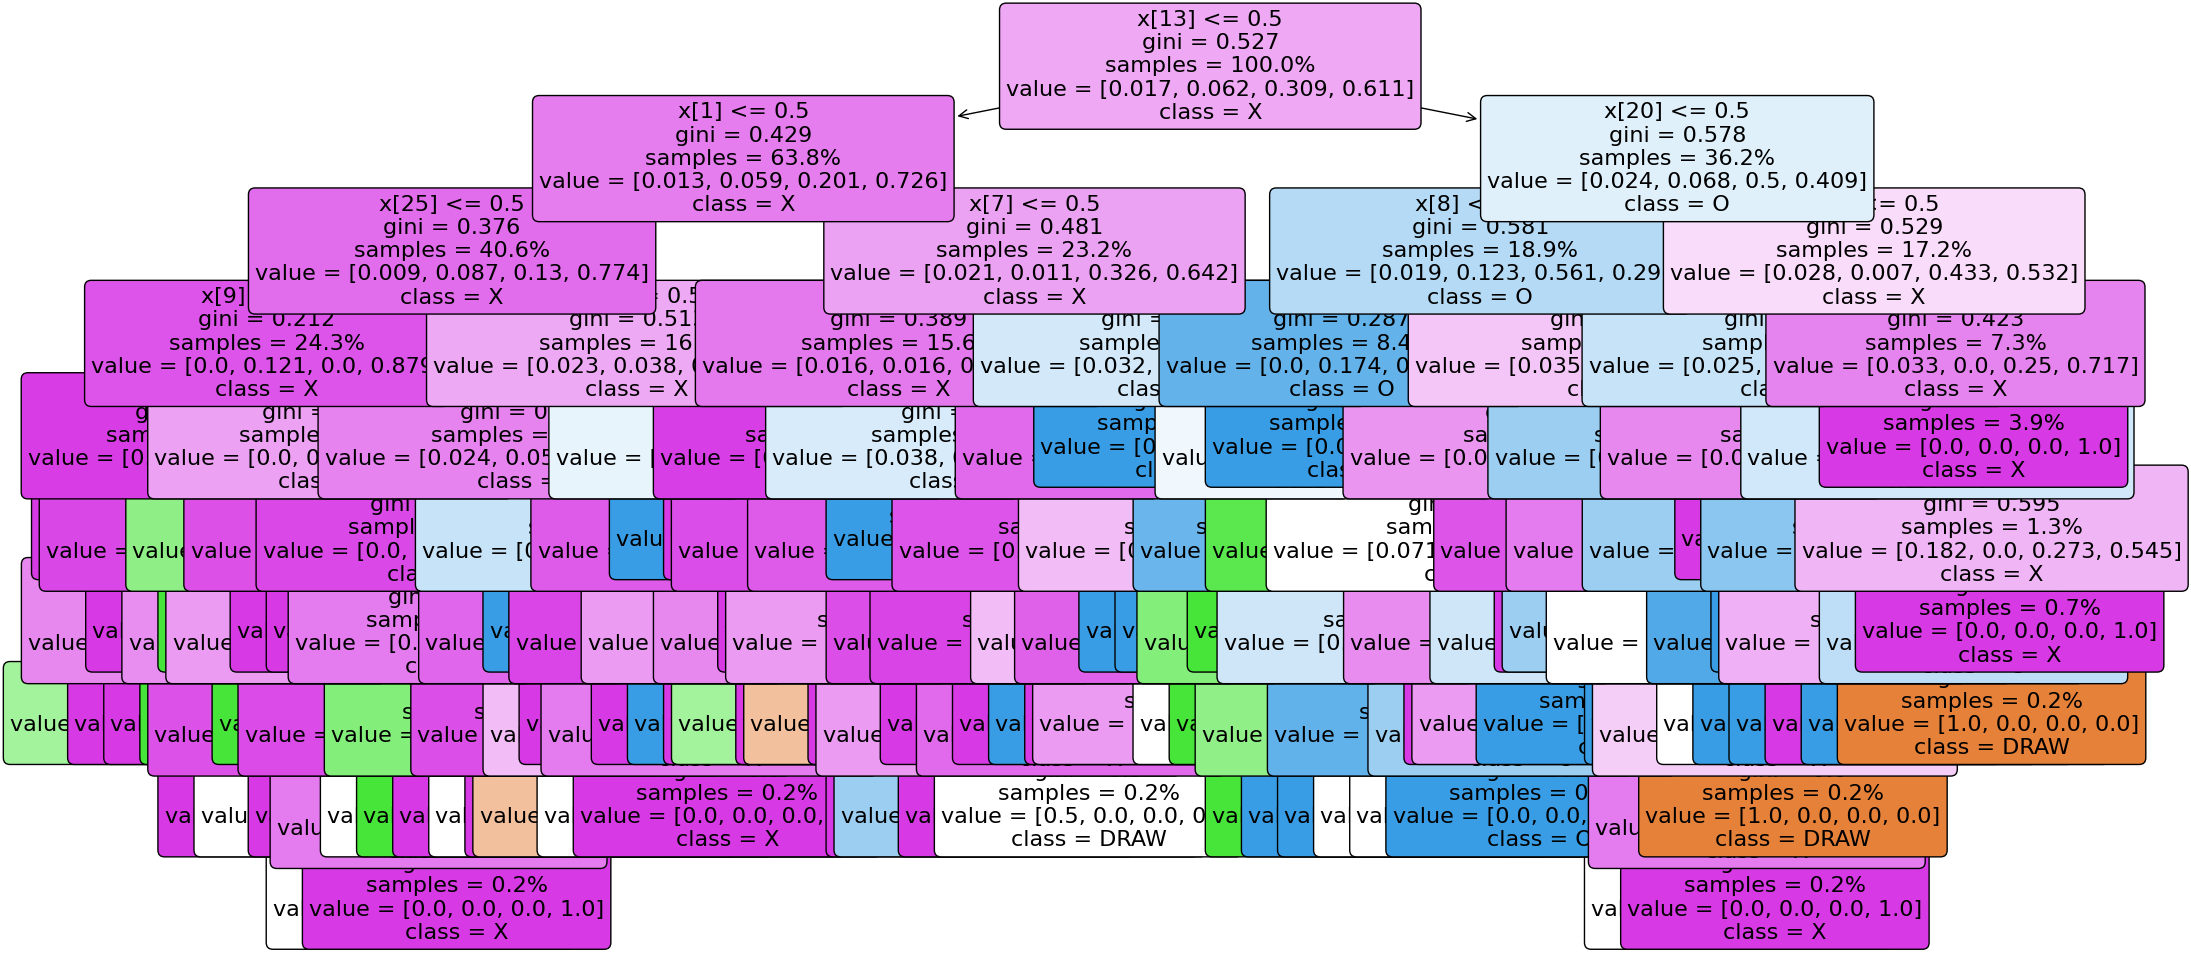

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))

tree.plot_tree(arvore,
               class_names=arvore.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)

In [35]:
end_game = pd.DataFrame( [['x','b','o','b','b','x','b','b','b']],
                                    columns=['atr1','atr2','atr3','atr4','atr5','atr6','atr7','atr8','atr9'])

valid_end_game = preproc_completo.transform(end_game)
predicted = knn_clf.predict(valid_end_game)
print(predicted)

['GAME']


In [36]:
def verify_game(board):
    end_game = pd.DataFrame( [board],
                                    columns=['atr1','atr2','atr3','atr4','atr5','atr6','atr7','atr8','atr9'])
    valid_game = preproc_completo.transform(end_game)
    result = knn_clf.predict(valid_game)
    return result[0]